In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from google.colab import files
files.upload()

Saving test to test
Saving train to train


In [0]:
import keras
from keras.datasets import cifar10
from keras import applications, Sequential, Model, optimizers, models
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, History
from keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from io import BytesIO
import numpy as np
from keras.initializers import glorot_uniform

Creating models directory

In [0]:
path = os.path.join("/content/gdrive/My Drive/CIFAR-10/", "models/")
os.mkdir(path)
modelsDir = "/content/gdrive/My Drive/CIFAR-10/models/"

In [117]:
(imagesTrain, labelsTrain), (imagesTest, labelsTest) = cifar10.load_data()
size = 32
print(imagesTrain.shape)
print(imagesTest.shape)
print(labelsTrain.shape)
print(labelsTest.shape)
epochs = 15

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Normalize images

In [0]:
imagesTrain, imagesTest = imagesTrain / 255.0, imagesTest / 255.0

Train given model on CIFAR-10 dataset

In [0]:
def trainModel(model, name):
  pattern = model(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

  md = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

  md.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  
  history = md.fit(imagesTrain, labelsTrain, epochs=epochs, 
                    validation_data=(imagesTest, labelsTest))
  
  md.save(modelsDir + name + ".h5")


  def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

  plotmodelhistory(history)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Epoch 1/15
1563/1563 [==============================] - 68s 44ms/step - loss: 1.7023 - accuracy: 0.4045 - val_loss: 1.3582 - val_accuracy: 0.5115
Epoch 2/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.2342 - accuracy: 0.5655 - val_loss: 1.2557 - val_accuracy: 0.5547
Epoch 3/15
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0729 - accuracy: 0.6247 - val_loss: 1.1305 - val_accuracy: 0.6085
Epoch 4/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9591 - accuracy: 0.6659 - val_loss: 1.0890 - val_accuracy: 0.6305
Epoch 5/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8784 - accuracy: 0.6947 - val_loss: 1.0605 - val_accuracy: 0.6376
Epoch 6/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8072 - accuracy: 0.7204 - val_loss: 1.0585 - val_accuracy: 0.6562
Epoch 7/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7464 - accuracy: 0.7399 - val_loss: 1.0477 -

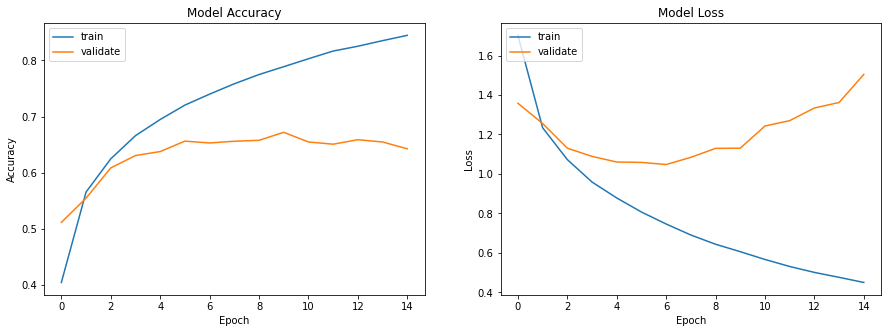

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Epoch 1/15
1563/1563 [==============================] - 68s 44ms/step - loss: 1.8546 - accuracy: 0.3876 - val_loss: 1.4526 - val_accuracy: 0.4745
Epoch 2/15
1563/1563 [==============================] - 68s 44ms/step - loss: 1.2914 - accuracy: 0.5416 - val_loss: 1.1815 - val_accuracy: 0.5839
Epoch 3/15
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1259 - accuracy: 0.6031 - val_loss: 1.1070 - val_accuracy: 0.6184
Epoch 4/15
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0146 - accuracy: 0.6434 - val_loss: 1.0478 - val_accuracy: 0.6369
Epoch 5/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9259 - accuracy: 0.6747 - val_loss: 1.0261 - val_accuracy: 0.6463
Epoch 6/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8679 - accuracy: 0.6957 - val_loss: 1.0484 - val_accuracy: 0.6450
Epoch 7/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8006 - accuracy: 0.7181 - val_loss: 1.0673 -

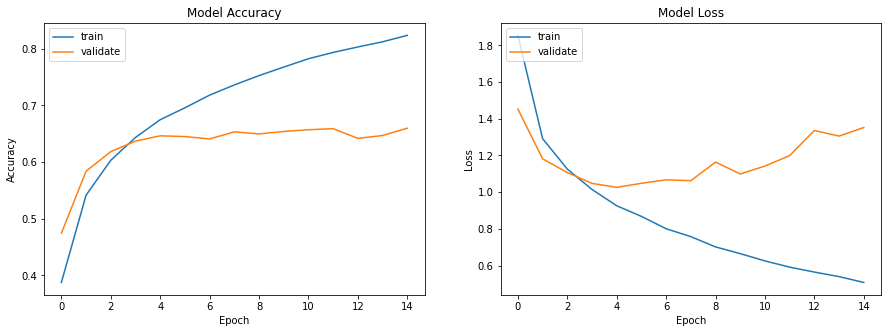

In [144]:
trainModel(applications.MobileNet, "MobileNet")
trainModel(applications.MobileNetV2, "MobileNetV2")

We can predict image from test dataset by it's number

In [0]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
labelsTrue = np.argmax(labelsTest, axis=1)
from tensorflow.keras.models import load_model
def showTestImage(number):
    fig = plt.figure(figsize = (3,3))
    testImage = np.expand_dims(imagesTest[number], axis=0)
    for modelFile in os.listdir(modelsDir):
      modelDir = modelsDir + modelFile
      print(modelDir)
      model = tf.keras.models.load_model(modelDir)
      # predictions = model.predict(imagesTmp)
      testResult = model.predict_classes(testImage)
      plt.imshow(imagesTest[number])
      dictKey = testResult[0]
      plt.title("Predicted: {} \nTrue Label: {}".format(labels[dictKey],
                                                      labels[int(labelsTest[number])]))
      plt.show()

/content/gdrive/My Drive/CIFAR-10/models/MobileNet.h5


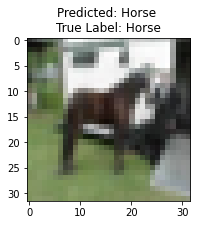

/content/gdrive/My Drive/CIFAR-10/models/MobileNetV2.h5


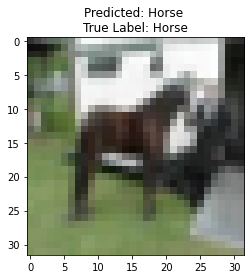

In [169]:
showTestImage(20)

For MobileNet prefered size is (224, 224), so for this extremly small images (32,32), output will be more randomly, but actually it can predict something about proper value.